In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

In [2]:
data = pd.read_csv(r'/home/sinbad/Downloads/aviators.csv')
data.head()

,date,time,bidders,odds
0,2024-08-06,15:0:53,3886,3.15x
1,2024-08-06,15:1:15,4657,2.14x
2,2024-08-06,15:1:50,4410,6.74x
3,2024-08-06,15:2:12,4680,1.61x
4,2024-08-06,15:2:35,1,1.00x


In [3]:
data['Time2']= data['date'].astype(str) + '-' + data['time'].astype(str)
data

,date,time,bidders,odds,Time2
0,2024-08-06,15:0:53,3886,3.15x,2024-08-06-15:0:53
1,2024-08-06,15:1:15,4657,2.14x,2024-08-06-15:1:15
2,2024-08-06,15:1:50,4410,6.74x,2024-08-06-15:1:50
3,2024-08-06,15:2:12,4680,1.61x,2024-08-06-15:2:12
4,2024-08-06,15:2:35,1,1.00x,2024-08-06-15:2:35
...,...,...,...,...,...
2604,2024-08-07,9:51:33,0,1.13x,2024-08-07-9:51:33
2605,2024-08-07,9:51:45,0,1.44x,2024-08-07-9:51:45
2606,2024-08-07,9:52:7,0,1.45x,2024-08-07-9:52:7
2607,2024-08-07,9:52:30,0,2.25x,2024-08-07-9:52:30


In [4]:
data = data.drop(['date','time'], axis=1)


In [5]:
data['Time2'] = pd.to_datetime(data['Time2'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   bidders  2609 non-null   int64         
 1   odds     2609 non-null   object        
 2   Time2    2609 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 61.3+ KB


In [6]:
data['odds'] = data['odds'].str[:-1]
data

,bidders,odds,Time2
0,3886,3.15,2024-08-06 15:00:53
1,4657,2.14,2024-08-06 15:01:15
2,4410,6.74,2024-08-06 15:01:50
3,4680,1.61,2024-08-06 15:02:12
4,1,1.00,2024-08-06 15:02:35
...,...,...,...
2604,0,1.13,2024-08-07 09:51:33
2605,0,1.44,2024-08-07 09:51:45
2606,0,1.45,2024-08-07 09:52:07
2607,0,2.25,2024-08-07 09:52:30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   bidders  2609 non-null   int64         
 1   odds     2609 non-null   object        
 2   Time2    2609 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 61.3+ KB


In [8]:
data.odds = pd.to_numeric(data.odds)

In [9]:
data.tail()

,bidders,odds,Time2
2604,0,1.13,2024-08-07 09:51:33
2605,0,1.44,2024-08-07 09:51:45
2606,0,1.45,2024-08-07 09:52:07
2607,0,2.25,2024-08-07 09:52:30
2608,0,1.19,2024-08-07 09:52:41


In [11]:
# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(data['odds'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -51.45164092571627
p-value: 0.0
Critical Values:
1%: -3.4328598727101833
5%: -2.862648868616968
10%: -2.5673602902877883


this means that the values are stationary and does not depend on time 

In [12]:
multplicative = seasonal_decompose(data['odds'], model = 'multiplicative', period=30)
additive = seasonal_decompose(data['odds'], model='additive', period = 30)

<Figure size 2000x1000 with 0 Axes>

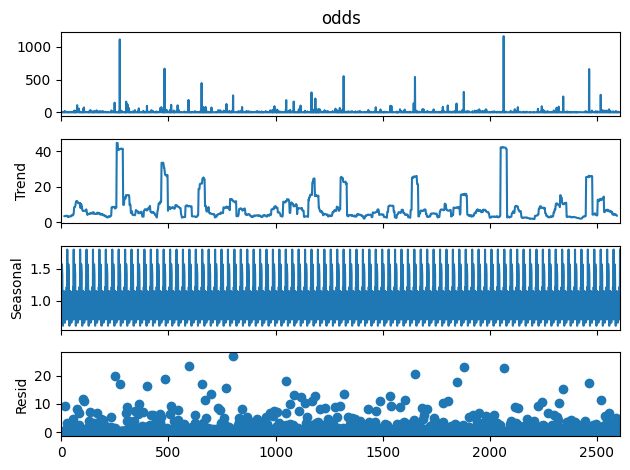

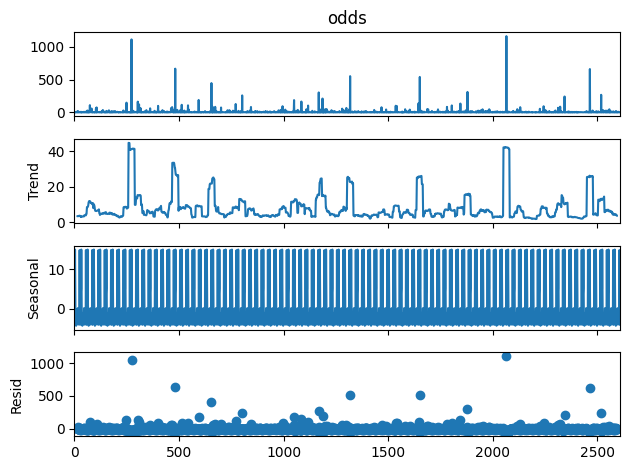

In [13]:
plt.figure(figsize=(20,10))
multplicative.plot()
additive.plot()
plt.show()

In [14]:

data2 =data[['Time2','odds']]
data2

,Time2,odds
0,2024-08-06 15:00:53,3.15
1,2024-08-06 15:01:15,2.14
2,2024-08-06 15:01:50,6.74
3,2024-08-06 15:02:12,1.61
4,2024-08-06 15:02:35,1.00
...,...,...
2604,2024-08-07 09:51:33,1.13
2605,2024-08-07 09:51:45,1.44
2606,2024-08-07 09:52:07,1.45
2607,2024-08-07 09:52:30,2.25


In [15]:
# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(data['odds'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -51.45164092571627
p-value: 0.0
Critical Values:
1%: -3.4328598727101833
5%: -2.862648868616968
10%: -2.5673602902877883


In [16]:
print(f'2 odds has     {(data.odds > 2).sum()/data.odds.value_counts().sum()} %')
print(f'1.6 odds has   {(data.odds > 1.6).sum()/data.odds.value_counts().sum()} %')
print(f'1.5 odds has   {(data.odds > 1.5).sum()/data.odds.value_counts().sum()} %')
print(f'1.4 odds has   {(data.odds > 1.4).sum()/data.odds.value_counts().sum()} %')
print(f'1.3 odds has   {(data.odds > 1.3).sum()/data.odds.value_counts().sum()} %')

2 odds has     0.47757761594480647 %
1.6 odds has   0.5891146032962821 %
1.5 odds has   0.6262935990801073 %
1.4 odds has   0.6757378305864316 %
1.3 odds has   0.7270985051743963 %


by this means that 58.9 percent of the comming odds comes larger than 1.6 odds and so on as viewed

In [17]:

previous_number = None


steps = 0


for number in data['odds']:

    steps += 1
    
    if number > 5:
        if previous_number is not None:
            print(f"Steps taken: {steps - 1}, Number greater than 5 found: {number}, Previous number: {previous_number}")
        else:
            print(f"Steps taken: {steps - 1}, Number greater than 5 found: {number}, No previous number")
    
    previous_number = number


Steps taken: 2, Number greater than 5 found: 6.74, Previous number: 2.14
Steps taken: 12, Number greater than 5 found: 11.62, Previous number: 1.63
Steps taken: 17, Number greater than 5 found: 20.65, Previous number: 1.0
Steps taken: 27, Number greater than 5 found: 8.32, Previous number: 1.86
Steps taken: 28, Number greater than 5 found: 5.77, Previous number: 8.32
Steps taken: 32, Number greater than 5 found: 8.21, Previous number: 1.39
Steps taken: 34, Number greater than 5 found: 6.38, Previous number: 1.0
Steps taken: 39, Number greater than 5 found: 5.54, Previous number: 2.32
Steps taken: 45, Number greater than 5 found: 5.82, Previous number: 1.28
Steps taken: 46, Number greater than 5 found: 9.19, Previous number: 5.82
Steps taken: 53, Number greater than 5 found: 6.43, Previous number: 3.05
Steps taken: 57, Number greater than 5 found: 15.66, Previous number: 1.65
Steps taken: 62, Number greater than 5 found: 28.11, Previous number: 1.75
Steps taken: 68, Number greater than 

In [18]:

previous_number = None


steps = 0


for number in data['odds']:

    steps += 1
    
    if number > 2:
        if previous_number is not None:
            print(f"Steps taken: {steps - 1}, Number greater than 2 found: {number}, Previous number: {previous_number}")
        else:
            print(f"Steps taken: {steps - 1}, Number greater than 2 found: {number}, No previous number")
    
    previous_number = number


Steps taken: 0, Number greater than 2 found: 3.15, No previous number
Steps taken: 1, Number greater than 2 found: 2.14, Previous number: 3.15
Steps taken: 2, Number greater than 2 found: 6.74, Previous number: 2.14
Steps taken: 6, Number greater than 2 found: 3.37, Previous number: 1.4
Steps taken: 10, Number greater than 2 found: 3.61, Previous number: 1.42
Steps taken: 12, Number greater than 2 found: 11.62, Previous number: 1.63
Steps taken: 13, Number greater than 2 found: 3.74, Previous number: 11.62
Steps taken: 14, Number greater than 2 found: 2.86, Previous number: 3.74
Steps taken: 17, Number greater than 2 found: 20.65, Previous number: 1.0
Steps taken: 21, Number greater than 2 found: 2.2, Previous number: 1.27
Steps taken: 22, Number greater than 2 found: 3.46, Previous number: 2.2
Steps taken: 27, Number greater than 2 found: 8.32, Previous number: 1.86
Steps taken: 28, Number greater than 2 found: 5.77, Previous number: 8.32
Steps taken: 29, Number greater than 2 found: 

In [19]:

previous_number = None


steps = 0


for number in data['odds']:

    steps += 1
    
    if number > 100:
        if previous_number is not None:
            print(f"Steps taken: {steps - 1}, Number greater than 100 found: {number}, Previous number: {previous_number}")
        else:
            print(f"Steps taken: {steps - 1}, Number greater than 100 found: {number}, No previous number")
    
    previous_number = number


Steps taken: 74, Number greater than 100 found: 109.65, Previous number: 1.61
Steps taken: 249, Number greater than 100 found: 147.96, Previous number: 1.06
Steps taken: 273, Number greater than 100 found: 1110.15, Previous number: 1.87
Steps taken: 303, Number greater than 100 found: 163.08, Previous number: 1.0
Steps taken: 309, Number greater than 100 found: 121.89, Previous number: 37.55
Steps taken: 482, Number greater than 100 found: 664.96, Previous number: 1.24
Steps taken: 513, Number greater than 100 found: 115.28, Previous number: 3.76
Steps taken: 543, Number greater than 100 found: 107.1, Previous number: 4.0
Steps taken: 594, Number greater than 100 found: 188.87, Previous number: 1.39
Steps taken: 655, Number greater than 100 found: 445.67, Previous number: 22.67
Steps taken: 771, Number greater than 100 found: 127.4, Previous number: 1.6
Steps taken: 802, Number greater than 100 found: 258.33, Previous number: 2.06
Steps taken: 1050, Number greater than 100 found: 186.6

In [21]:
for i in range(len(data['odds']) - 1):
    
    
    if data['odds'][i] < 1.06:
        
        
        next_number = data['odds'][i + 1]
        second_next = data['odds'][i+2]
        third_next = data['odds'][i+3]
        print(f"Number less than 1.06 found: {data['odds'][i]}, Next numbers are: {next_number}, {second_next}, {third_next}")


Number less than 1.06 found: 1.0, Next numbers are: 1.4, 3.37, 1.14
Number less than 1.06 found: 1.0, Next numbers are: 20.65, 1.24, 1.16
Number less than 1.06 found: 1.0, Next numbers are: 6.38, 1.15, 2.05
Number less than 1.06 found: 1.04, Next numbers are: 1.28, 5.82, 9.19
Number less than 1.06 found: 1.03, Next numbers are: 25.06, 1.65, 3.26
Number less than 1.06 found: 1.03, Next numbers are: 1.1, 5.1, 1.73
Number less than 1.06 found: 1.02, Next numbers are: 1.83, 2.36, 1.42
Number less than 1.06 found: 1.0, Next numbers are: 1.09, 2.36, 7.03
Number less than 1.06 found: 1.0, Next numbers are: 3.42, 1.24, 2.89
Number less than 1.06 found: 1.0, Next numbers are: 1.3, 1.67, 1.21
Number less than 1.06 found: 1.0, Next numbers are: 3.26, 1.0, 1.01
Number less than 1.06 found: 1.0, Next numbers are: 1.01, 1.19, 2.24
Number less than 1.06 found: 1.01, Next numbers are: 1.19, 2.24, 22.59
Number less than 1.06 found: 1.0, Next numbers are: 1.6, 8.09, 4.78
Number less than 1.06 found: 1.0

<h1>HERE IS THE BINGO I HAVE FOUND THAT AFTER A NUMBER LOSS THAN 1.06 THE NEXT THREE ODDS ARE MOSTLY HIGH<h1>

In [25]:
for i in range(len(data['odds']) - 1):
    
    
    if data['odds'][i] < 1.06:
        
        
        next_number = data['odds'][i + 1]
        second_next = data['odds'][i+2]
        print(f"Number less than 1.06 found: {data['odds'][i]}, Next numbers are: {next_number}, {second_next}")


Number less than 1.06 found: 1.0, Next numbers are: 1.4, 3.37
Number less than 1.06 found: 1.0, Next numbers are: 20.65, 1.24
Number less than 1.06 found: 1.0, Next numbers are: 6.38, 1.15
Number less than 1.06 found: 1.04, Next numbers are: 1.28, 5.82
Number less than 1.06 found: 1.03, Next numbers are: 25.06, 1.65
Number less than 1.06 found: 1.03, Next numbers are: 1.1, 5.1
Number less than 1.06 found: 1.02, Next numbers are: 1.83, 2.36
Number less than 1.06 found: 1.0, Next numbers are: 1.09, 2.36
Number less than 1.06 found: 1.0, Next numbers are: 3.42, 1.24
Number less than 1.06 found: 1.0, Next numbers are: 1.3, 1.67
Number less than 1.06 found: 1.0, Next numbers are: 3.26, 1.0
Number less than 1.06 found: 1.0, Next numbers are: 1.01, 1.19
Number less than 1.06 found: 1.01, Next numbers are: 1.19, 2.24
Number less than 1.06 found: 1.0, Next numbers are: 1.6, 8.09
Number less than 1.06 found: 1.0, Next numbers are: 4.83, 1.34
Number less than 1.06 found: 1.04, Next numbers are: 1

<h1>ANOTHER ONE THIS ONE SHOWS THE NEXT TWO NUMBERS ALSO NOT BAD<h2>

In [24]:

previous_number = None


steps = 0


for number in data['odds']:

    steps += 1
    
    if number < 1.06:
        if previous_number is not None:
            print(f"Steps taken: {steps - 1}")
        else:
            print(f"Steps taken: {steps - 1}")
    
    previous_number = number


Steps taken: 4
Steps taken: 16
Steps taken: 33
Steps taken: 43
Steps taken: 83
Steps taken: 92
Steps taken: 110
Steps taken: 117
Steps taken: 127
Steps taken: 132
Steps taken: 148
Steps taken: 150
Steps taken: 151
Steps taken: 157
Steps taken: 168
Steps taken: 173
Steps taken: 192
Steps taken: 212
Steps taken: 225
Steps taken: 227
Steps taken: 228
Steps taken: 255
Steps taken: 256
Steps taken: 262
Steps taken: 283
Steps taken: 289
Steps taken: 295
Steps taken: 302
Steps taken: 331
Steps taken: 342
Steps taken: 356
Steps taken: 358
Steps taken: 363
Steps taken: 368
Steps taken: 372
Steps taken: 381
Steps taken: 450
Steps taken: 454
Steps taken: 459
Steps taken: 477
Steps taken: 486
Steps taken: 489
Steps taken: 503
Steps taken: 508
Steps taken: 524
Steps taken: 526
Steps taken: 551
Steps taken: 559
Steps taken: 564
Steps taken: 573
Steps taken: 589
Steps taken: 598
Steps taken: 602
Steps taken: 604
Steps taken: 608
Steps taken: 643
Steps taken: 660
Steps taken: 672
Steps taken: 676
Step